In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

Welcome to JupyROOT 6.26/04


In [2]:
from main.draw_tools.stacking import make_dict_data, make_dict_data_list

In [6]:
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

#base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.85 && abs(D0_cosHel_0)<0.8'
base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'


base_filter = ' kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9'
# base_filter = ' kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = '  D0_M>1.68 && D0_M<2.05 '

# tree = 'control'
# tree = 'antiKstar'
tree = 'phi'
# variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E']
variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p']

# var = 'D0_M'

base_file_loc =  '/media/jykim/T7/storage/01_recon/v9mask_pi0calib_sigext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_pi0calib_sigext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'



In [8]:

file_ccbar = []
file_uubar = []
file_ddbar = []
file_ssbar = []
file_charged = []
file_mixed = []
file_taupair = []

for i in range(1,193):
    file_loc = base_file_loc + 'ccbar/recon_udst_' + str(i).zfill(6) + '_.root'
    file_ccbar.append(file_loc)
    
for i in range(1,59):
    file_loc = base_file_loc + 'uubar/recon_udst_' + str(i).zfill(6) + '_.root'
    file_uubar.append(file_loc)
    
for i in range(1,18):
    file_loc = base_file_loc + 'ddbar/recon_udst_' + str(i).zfill(6) + '_.root'
    file_ddbar.append(file_loc)
for i in range(1,10):
    file_loc = base_file_loc + 'ssbar/recon_udst_' + str(i).zfill(6) + '_.root'
    file_ssbar.append(file_loc)
for i in range(1,13):
    file_loc = base_file_loc + 'charged/recon_udst_' + str(i).zfill(6) + '_.root'
    file_charged.append(file_loc)
for i in range(1,14):
    file_loc = base_file_loc + 'mixed/recon_udst_' + str(i).zfill(6) + '_.root'
    file_mixed.append(file_loc)
for i in range(1,8):
    file_loc = base_file_loc + 'taupair/recon_udst_' + str(i).zfill(6) + '_.root'
    file_taupair.append(file_loc)
    

base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)





In [11]:
def Draw(var, xrange:tuple, density=False):
    global pd_ccbar
    global pd_uubar
    global pd_ddbar
    global pd_ssbar
    global pd_charged
    global pd_mixed
    global pd_taupair
    var = var
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    colors=b2helix(7)


    var = var
    data_list=dict()
    #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    mixed_bkg = {var : pd_mixed[var] }
    charged_bkg = {var : pd_charged[var] }
    ccbar_bkg = {var : pd_ccbar[var] }
    uubar_bkg = {var : pd_uubar[var] }
    ddbar_bkg = {var : pd_ddbar[var] }
    ssbar_bkg = {var : pd_ssbar[var] }
    taupair_bkg = {var : pd_taupair[var] }

    #print(mixed_bkg)
    #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

    #     for labeling in labels:
    xrange=xrange
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black',density=density)
    # plt.hist(kshort_gamma['D0_M'], label='kshort gamma',bins=xm,  histtype='step', density=True) 
    #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()

    #     DRAW(pd_Dtokshortpi0, cut)

    watermark(t="",logo="MC15ri")
    ax=plt.gca()
    #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
    #     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

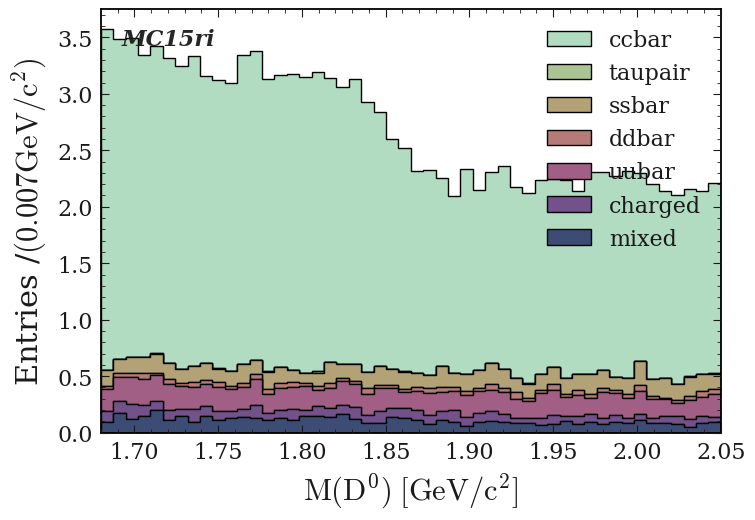

<Figure size 800x550 with 0 Axes>

In [13]:
Draw('D0_M',(1.68, 2.05),density=True)

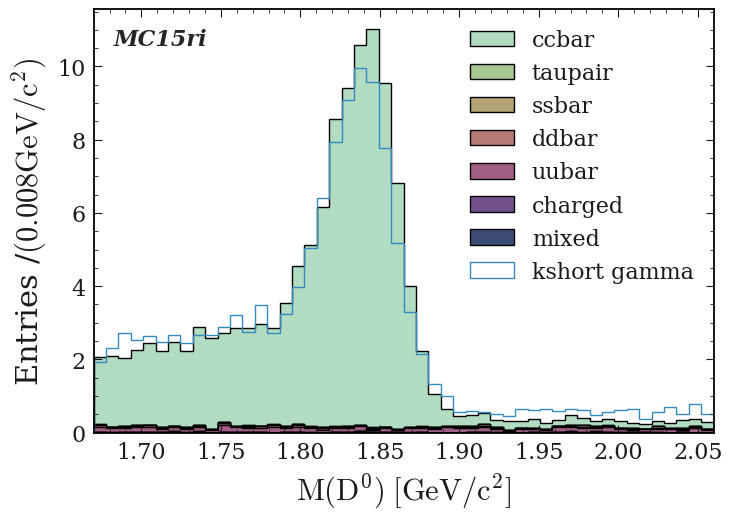

<Figure size 800x550 with 0 Axes>

In [41]:
Draw('D0_M',(1.67, 2.06),density=True)

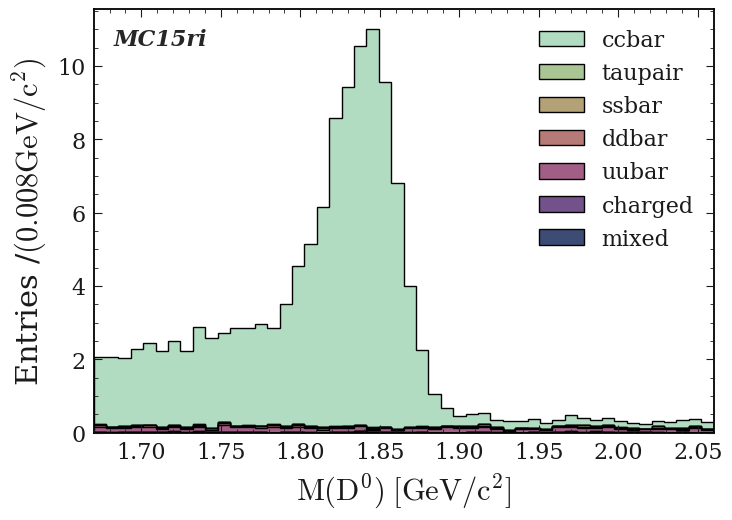

<Figure size 800x550 with 0 Axes>

In [14]:
Draw('D0_M',(1.67, 2.06),density=True)

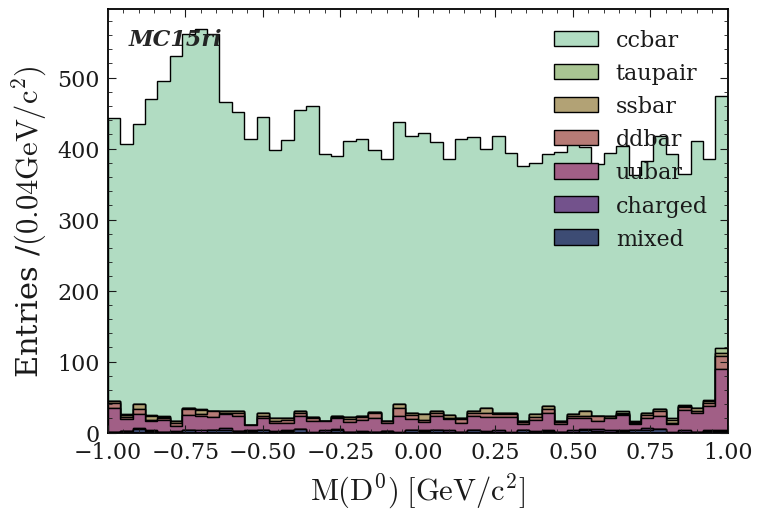

<Figure size 800x550 with 0 Axes>

In [12]:
Draw('D0_cosHel_0',(-1,1))

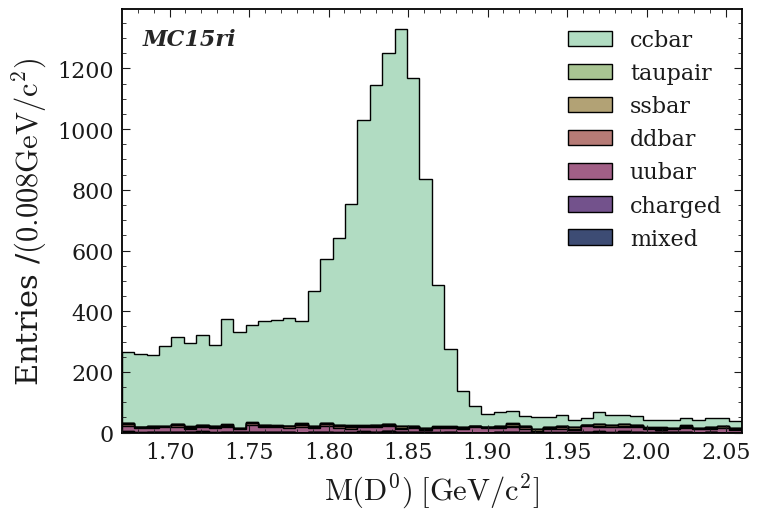

<Figure size 800x550 with 0 Axes>

In [82]:
Draw('D0_M')

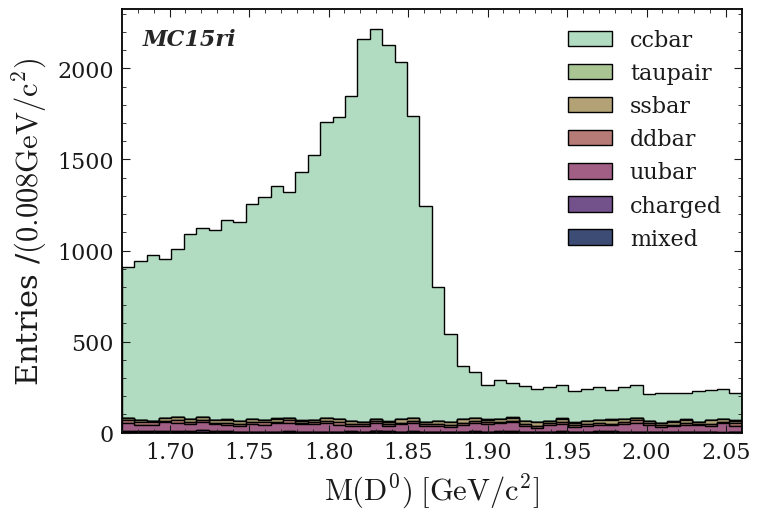

<Figure size 800x550 with 0 Axes>

In [74]:
Draw('D0_M')

In [119]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
tree = 'omega'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E']
var = 'D0_M'

In [120]:
phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'
#base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = base_filter
varaiables = variables
tree=tree

pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)


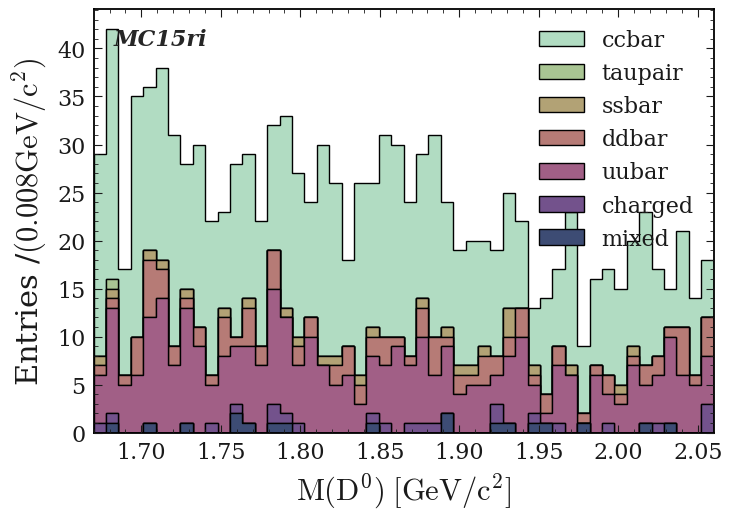

<Figure size 800x550 with 0 Axes>

In [121]:
Draw("D0_M")

In [39]:
file = '/media/jykim/T7/storage_b2/storage/pi0calib_23_pr_all_4S_v1/output_*.root'
tree = 'kshort'
variables = ['D0_M',"D0_cosHel_0"]
base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9 '
base_filter='kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.9 '
# base_filter='kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06  '

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E','Pi0_Prob']
tree='kshort'

kshort_gamma = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)

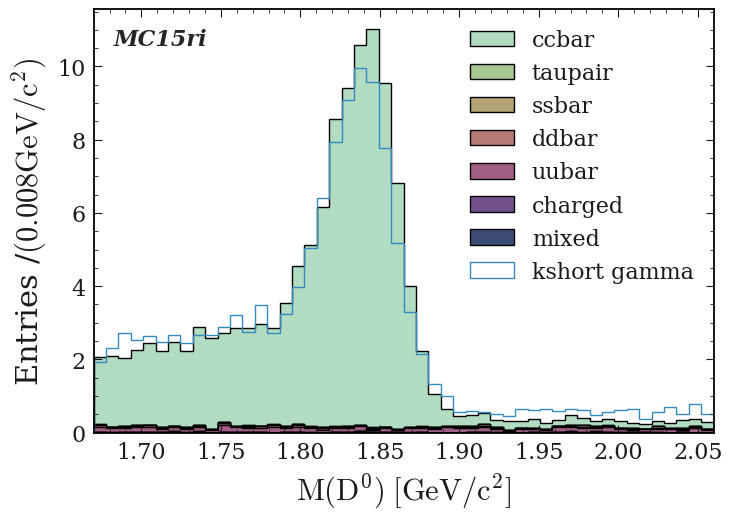

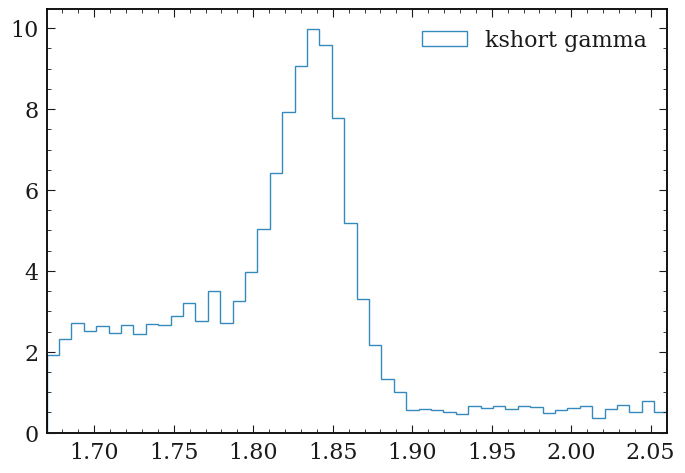

In [40]:
Draw('D0_M',(1.67, 2.06),density=True)
xrange = (1.67,2.06,51)
xm = np.linspace(*xrange)

plt.hist(kshort_gamma['D0_M'], label='kshort gamma',bins=xm,  histtype='step', density=True) 
# plt.hist(kshort_gamma['D0_M'], label='kshort gamma',bins=xm,  histtype='step', density=False) 
#plt.hist(kshort_gamma.query('Pi0_Prob<0.9')['D0_M'], label='kshort gamma',bins=xm,  histtype='step') 


#plt.hist(signal_pd_df['cosHelicityAngleMomentum'], label='not $\pi^0$ like',bins=xm,  histtype='step', density=True, hatch="//")

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
#xlabel = 'cosHelicityAngleMomentum'
#plot_title = r'A variable of $\pi^0$ veto'
#ax.set_xlabel(xlabel)
#plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')